# Ranging and Ransac

We'll use the following imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [2]:
laser = np.genfromtxt('laser.csv', delimiter=',')

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

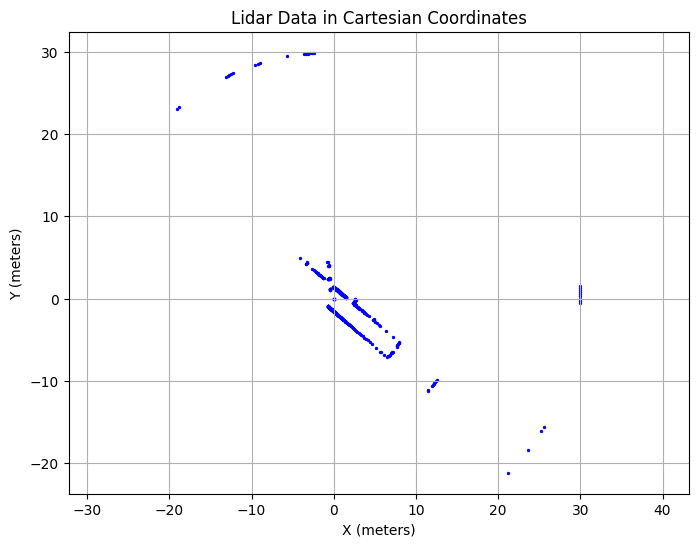

In [8]:
# Step 1: Load the lidar data from the CSV file
laser = np.genfromtxt('laser.csv', delimiter=',')
num_measurements = len(laser)

# Step 2: Calculate angles for each measurement
start_angle = 135  # Degrees
end_angle = -135  # Degrees
angles = np.linspace(np.radians(start_angle), np.radians(end_angle), num_measurements)

# Step 3: Convert polar coordinates (laser, angles) to Cartesian coordinates (x, y)
x = laser * np.cos(angles)
y = laser * np.sin(angles)

# Step 4: Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=2, color='blue')  # Use scatter plot for better visibility of individual points
plt.title('Lidar Data in Cartesian Coordinates')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.axis('equal')  # Keep aspect ratio equal to properly reflect distances
plt.grid(True)
plt.show()


## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

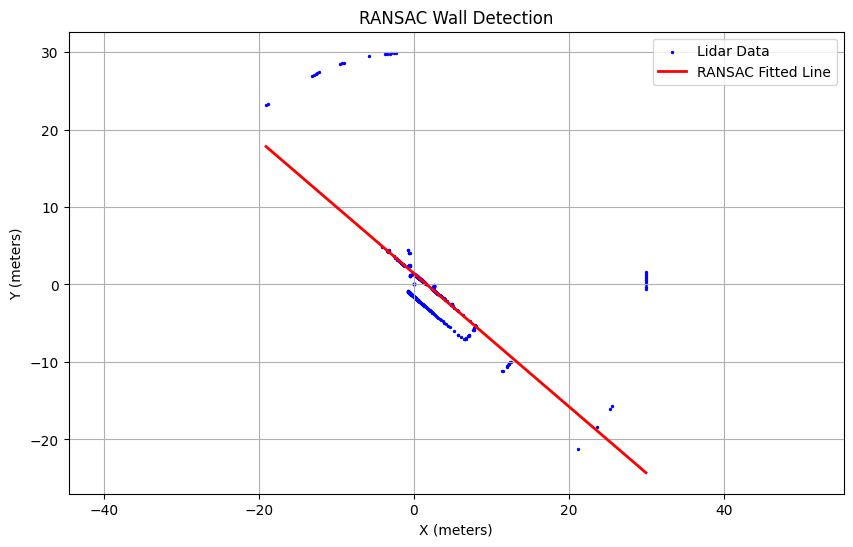

In [9]:
# Step 2: Prepare data for RANSAC
# Reshape x and y to be compatible with sklearn requirements (x should be 2D)
X = x.reshape(-1, 1)  # X should be a 2D array of shape (n_samples, n_features)
Y = y  # Y is a 1D array

# Step 3: Initialize and fit the RANSAC regressor
ransac = linear_model.RANSACRegressor()
ransac.fit(X, Y)

# Step 4: Predict the line using the fitted RANSAC model
# Define a range of x-values for predicting the line
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = ransac.predict(x_range)

# Step 5: Plot the original lidar data and the RANSAC line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=2, color='blue', label='Lidar Data')  # Original points
plt.plot(x_range, y_pred, color='red', linewidth=2, label='RANSAC Fitted Line')  # RANSAC line
plt.title('RANSAC Wall Detection')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

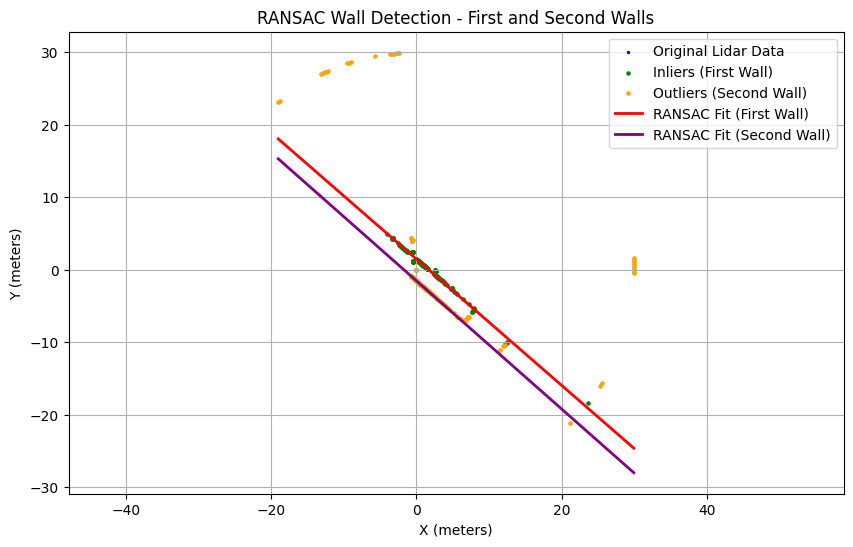

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

# Step 1: Load the lidar data
laser = np.genfromtxt('laser.csv', delimiter=',')
num_measurements = len(laser)
start_angle = 135  # Degrees
end_angle = -135  # Degrees
angles = np.linspace(np.radians(start_angle), np.radians(end_angle), num_measurements)

# Convert lidar polar coordinates to Cartesian coordinates
x = laser * np.cos(angles)
y = laser * np.sin(angles)

# Step 2: Prepare data for the first RANSAC fit
X = x.reshape(-1, 1)  # X should be a 2D array of shape (n_samples, n_features)
Y = y  # Y is a 1D array

# Step 3: Initialize and fit the first RANSAC regressor
ransac1 = linear_model.RANSACRegressor()
ransac1.fit(X, Y)

# Step 4: Identify inliers and outliers from the first RANSAC
inlier_mask_1 = ransac1.inlier_mask_
outlier_mask_1 = np.logical_not(inlier_mask_1)

# Predict the line for the first RANSAC fit
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred_1 = ransac1.predict(x_range)

# Step 5: Prepare data for the second RANSAC fit (using outliers from the first fit)
X_outliers = X[outlier_mask_1]
Y_outliers = Y[outlier_mask_1]

# Step 6: Initialize and fit the second RANSAC regressor
ransac2 = linear_model.RANSACRegressor()
ransac2.fit(X_outliers, Y_outliers)

# Predict the line for the second RANSAC fit
y_pred_2 = ransac2.predict(x_range)

# Step 7: Plot the original data points, inliers, first RANSAC line, and second RANSAC line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=2, color='blue', label='Original Lidar Data')  # Original lidar points
plt.scatter(X[inlier_mask_1], Y[inlier_mask_1], color='green', s=5, label='Inliers (First Wall)')  # First RANSAC inliers
plt.scatter(X[outlier_mask_1], Y[outlier_mask_1], color='orange', s=5, label='Outliers (Second Wall)')  # Points used for second RANSAC
plt.plot(x_range, y_pred_1, color='red', linewidth=2, label='RANSAC Fit (First Wall)')  # First RANSAC line
plt.plot(x_range, y_pred_2, color='purple', linewidth=2, label='RANSAC Fit (Second Wall)')  # Second RANSAC line

plt.title('RANSAC Wall Detection - First and Second Walls')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()
